In [1]:
#!pip install docx
#!pip install python-docx
#!pip install PyDrive

In [2]:
import pandas as pd
import numpy as np
import re
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sn
import random
%matplotlib inline

import docx 


In [3]:
data=pd.read_excel("Narrative2.xlsx")

In [4]:
data.shape

(2009, 31)

In [5]:
newdata=data.copy()

In [6]:
newdata.head()

,Upload Date,Retailer Code,UPC,Sale Quantity,Sale Value,DC Code,Store Code,Brand,Brand_Type,Business_Range,...,Week,Year,DC_Name,Retailer_Country,Retailer_Name,Retailer_Region,Store_City,Store_Name,Store_Region,Store_Status
0,2019-02-17,500033,887719065472,13,311.87,171,1225,GRANDEUR,RETAILER OWNED,RETAIL CORE PRODUCTS,...,WEEK 07,2016,NaN,US,COSTCO,WA,US,REDMOND,WA,ACTIVE
1,2019-02-17,500033,887719065472,0,0.00,171,COSTCO9999,GRANDEUR,RETAILER OWNED,RETAIL CORE PRODUCTS,...,WEEK 07,2016,NaN,US,COSTCO,WA,NaN,NaN,NaN,NaN
2,2019-02-17,500033,887719066691,14,111.86,171,1225,CHARISMA,RETAILER OWNED,RETAIL CORE PRODUCTS,...,WEEK 07,2016,NaN,US,COSTCO,WA,US,REDMOND,WA,ACTIVE
3,2019-02-17,500033,887719066691,0,0.00,171,COSTCO9999,CHARISMA,RETAILER OWNED,RETAIL CORE PRODUCTS,...,WEEK 07,2016,NaN,US,COSTCO,WA,NaN,NaN,NaN,NaN
4,2019-02-17,500033,887719068558,28,223.72,171,1225,CHARISMA,RETAILER OWNED,RETAIL CORE PRODUCTS,...,WEEK 07,2016,NaN,US,COSTCO,WA,US,REDMOND,WA,ACTIVE


In [7]:
newdata.isnull().sum()

Upload Date                      0
Retailer Code                    0
UPC                              0
Sale Quantity                    0
Sale Value                       0
DC Code                          0
Store Code                       0
Brand                            0
Brand_Type                       0
Business_Range                   0
Color                            0
Color_Group                      0
LBS                              0
MRP                              0
Product_Group_Category           0
Product_Group_Sub_Category       0
Program                          0
Shade_Type                       0
Size                             0
Status                           0
Month                            0
Week                             0
Year                             0
DC_Name                       2009
Retailer_Country                 0
Retailer_Name                    0
Retailer_Region                  0
Store_City                     142
Store_Name          

In [8]:
newdata.dropna(how='all', axis=1, inplace=True)

In [9]:
newdata.dropna(how='all', axis=0, inplace=True)

In [10]:
newdata.shape

(2009, 30)

In [11]:
newdata.columns

Index(['Upload Date', 'Retailer Code', 'UPC', 'Sale Quantity', 'Sale Value',
       'DC Code', 'Store Code', 'Brand', 'Brand_Type', 'Business_Range',
       'Color', 'Color_Group', 'LBS', 'MRP', 'Product_Group_Category',
       'Product_Group_Sub_Category', 'Program', 'Shade_Type', 'Size', 'Status',
       'Month', 'Week', 'Year', 'Retailer_Country', 'Retailer_Name',
       'Retailer_Region', 'Store_City', 'Store_Name', 'Store_Region',
       'Store_Status'],
      dtype='object')

In [12]:
per_null_vals=[{col:(newdata[col].isnull().sum()/len(newdata[col]))*100} for col in newdata.columns]
per_null_vals

[{'Upload Date': 0.0},
 {'Retailer Code': 0.0},
 {'UPC': 0.0},
 {'Sale Quantity': 0.0},
 {'Sale Value': 0.0},
 {'DC Code': 0.0},
 {'Store Code': 0.0},
 {'Brand': 0.0},
 {'Brand_Type': 0.0},
 {'Business_Range': 0.0},
 {'Color': 0.0},
 {'Color_Group': 0.0},
 {'LBS': 0.0},
 {'MRP': 0.0},
 {'Product_Group_Category': 0.0},
 {'Product_Group_Sub_Category': 0.0},
 {'Program': 0.0},
 {'Shade_Type': 0.0},
 {'Size': 0.0},
 {'Status': 0.0},
 {'Month': 0.0},
 {'Week': 0.0},
 {'Year': 0.0},
 {'Retailer_Country': 0.0},
 {'Retailer_Name': 0.0},
 {'Retailer_Region': 0.0},
 {'Store_City': 7.068193130910901},
 {'Store_Name': 7.068193130910901},
 {'Store_Region': 7.068193130910901},
 {'Store_Status': 7.068193130910901}]

In [13]:
newdata.columns

Index(['Upload Date', 'Retailer Code', 'UPC', 'Sale Quantity', 'Sale Value',
       'DC Code', 'Store Code', 'Brand', 'Brand_Type', 'Business_Range',
       'Color', 'Color_Group', 'LBS', 'MRP', 'Product_Group_Category',
       'Product_Group_Sub_Category', 'Program', 'Shade_Type', 'Size', 'Status',
       'Month', 'Week', 'Year', 'Retailer_Country', 'Retailer_Name',
       'Retailer_Region', 'Store_City', 'Store_Name', 'Store_Region',
       'Store_Status'],
      dtype='object')

In [14]:
for col in newdata.columns:
    newdata.rename(columns={col:col.replace(' ','_')}, inplace=True)

In [15]:
newdata.columns

Index(['Upload_Date', 'Retailer_Code', 'UPC', 'Sale_Quantity', 'Sale_Value',
       'DC_Code', 'Store_Code', 'Brand', 'Brand_Type', 'Business_Range',
       'Color', 'Color_Group', 'LBS', 'MRP', 'Product_Group_Category',
       'Product_Group_Sub_Category', 'Program', 'Shade_Type', 'Size', 'Status',
       'Month', 'Week', 'Year', 'Retailer_Country', 'Retailer_Name',
       'Retailer_Region', 'Store_City', 'Store_Name', 'Store_Region',
       'Store_Status'],
      dtype='object')

In [16]:
for col in newdata.columns:
    if newdata[col].dtype=='O':
        newdata[col]=newdata[col].astype(str)

In [17]:
for ind,col in enumerate(newdata.columns):
    if newdata[col].isnull().any()==True and newdata[col].dtype==object:
        newdata[col]=newdata[col].fillna("A")
    elif newdata[col].isnull().any()==True and newdata[col].dtype=='O':
        newdata[col]=newdata[col].fillna("A")
    elif newdata[col].isnull().any()==True and newdata[col].dtype==str:
        newdata[col]=newdata[col].fillna("A")
    elif newdata[col].isnull().any()==True and newdata[col].dtype=='float32':
        newdata[col]=newdata[col].filla(newdata[col].mean())
    elif newdata[col].isnull().any()==True and newdata[col].dtype=='float64':
        newdata[col]=newdata[col].fillna(newdata[col].mean())
    elif newdata[col].isnull().any()==True and newdata[col].dtype=='int32':
        newdata[col]=newdata[col].fillna(newdata[col].mean())
    elif newdata[col].isnull().any()==True and newdata[col].dtype=='int64':
        newdata[col]=newdata[col].fillna(newdata[col].mean())
    elif newdata[col].isnull().any()==True and newdata[col].dtype=='int':
        newdata[col]=newdata[col].fillna(newdata[col].mean())
    elif newdata[col].isnull().any()==True and newdata[col].dtype=='float':
        newdata[col]=newdata[col].fillna(newdata[col].mean())

In [18]:
newdata.isnull().sum().sum()

0

In [19]:
newdata.columns

Index(['Upload_Date', 'Retailer_Code', 'UPC', 'Sale_Quantity', 'Sale_Value',
       'DC_Code', 'Store_Code', 'Brand', 'Brand_Type', 'Business_Range',
       'Color', 'Color_Group', 'LBS', 'MRP', 'Product_Group_Category',
       'Product_Group_Sub_Category', 'Program', 'Shade_Type', 'Size', 'Status',
       'Month', 'Week', 'Year', 'Retailer_Country', 'Retailer_Name',
       'Retailer_Region', 'Store_City', 'Store_Name', 'Store_Region',
       'Store_Status'],
      dtype='object')

In [20]:
newdata['Sale_Value']=newdata['Sale_Value'].apply(lambda x:round(x,1))


In [21]:
newdata['Store_Status']=newdata['Store_Status'].replace('nan', 'INACTIVE')

In [22]:
#Analysis

In [23]:
newdata['Sale_Quantity'].sum()

77969

In [24]:
newdata['Sale_Value'].sum()

835681.7

In [25]:
print(f"The Total Sales which was generated is {newdata['Sale_Value'].sum()} from the total quantity of {newdata['Sale_Quantity'].sum()} units which were sold.")

The Total Sales which was generated is 835681.7 from the total quantity of 77969 units which were sold.


In [26]:
dict_year_sale_val=OrderedDict()

In [27]:
#for each in range(len(newdata.groupby(['Year']).Sale_Value.sum())):
#   print(newdata.groupby(['Year']).Sale_Value.sum()[each])

In [28]:
#random.choice(list(year_statements.values()))


In [29]:
year_statements = {} 
year_statements['sent_1'] = 'The sale value for year {year} is $ {val} with the sale of {quan} quantity.'
year_statements['sent_2'] = 'In year {year}, the total sale value was $ {val} after selling {quan} quantities.'
year_statements['sent_3'] = '{quan} quantities were sold for value $ {val} in the year {year}.'
  
year_sale_val=[]
year_sale_quan=[]
year=[]
for each in newdata['Year'].unique():
    year_sale_val.append(round(newdata.loc[newdata['Year']==each]['Sale_Value'].sum()))
    year_sale_quan.append(round(newdata.loc[newdata['Year']==each]['Sale_Quantity'].sum()))
    year.append(each)

year_sale_quan_val=zip(year,year_sale_quan,year_sale_val)

for year,quan,val in year_sale_quan_val:
    random_choice_year=random.choice(list(year_statements.values()))
    print(random_choice_year.format(year=year,quan=quan,val=val))
    print('\n')

The sale value for year 2016 is $ 215908.0 with the sale of 19880 quantity.


24508 quantities were sold for value $ 250395.0 in the year 2017.


The sale value for year 2018 is $ 125597.0 with the sale of 12294 quantity.


The sale value for year 2019 is $ 243782.0 with the sale of 21287 quantity.




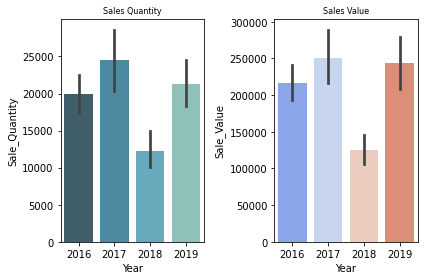

In [30]:
fig, ax=plt.subplots(1,2)
sn.barplot(x='Year',y='Sale_Quantity',data=newdata, estimator=sum, palette='GnBu_d',ax=ax[0])
ax[0].set_title('Sales Quantity',fontsize= 8)
sn.barplot(x='Year',y='Sale_Value',data=newdata, estimator=sum, palette='coolwarm',ax=ax[1])
ax[1].set_title('Sales Value',fontsize= 8)
plt.subplots_adjust(wspace = 0.8)
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()

In [31]:
store_status_statements = {} 
store_status_statements['sent_1'] = 'The total number of Active stores are {active} and remaining number of Inactive stores are {inactive}.'
store_status_statements['sent_2'] = 'Currently, there are {active} numbers of stores working and {inactive} stores have been shutted down.'
store_status_statements['sent_3'] = 'From the total number of stores, {active} number of stores are functioning and rest {inactive} are not functioning as of now.'

active=newdata['Store_Status'].value_counts()[0]
inactive=newdata['Store_Status'].value_counts()[1]

# random_store_status_choice=random.choice(list(store_status_statements.values()))
# print(random_store_status_choice.format(active=active, inactive=inactive))
# print('\n')

In [32]:
# fig=plt.figure()
# ax=fig.add_subplot(111)
# sn.countplot(newdata['Store_Status'],palette="Set2", ax=ax)
# plt.ticklabel_format(axis='y', style='plain')

In [33]:
month_maxsale_statements = {} 
month_maxsale_statements['sent_1'] = 'The maximum sale was done in a month {month} of last year {year} and the amount is $ {val} with the selling of quantities {quan}.'
month_maxsale_statements['sent_2'] = 'During the month of {month} of previous year {year}, the maximum sale was done and the value was {quan} after selling $ {val} quantities.'
month_maxsale_statements['sent_3'] = 'Last year in {year} and month {month}, the maximum sale of $ {val} was completed with the selling of {quan} quantities.'
  
month_minsale_statements = {} 
month_minsale_statements['sent_1'] = 'Also, In {month} month of previous year, it shows that a minimum sale of $ {val} was done with the selling of quantities {quan}.'
month_minsale_statements['sent_2'] = 'We can see that during the {month} month of previous year, the minimum sale was done and the value was $ {val} after selling {quan} quantities.'
month_minsale_statements['sent_3'] = 'In same year, during month {month}, the miniumum sale of amount $ {val} was completed with the selling {quan} quantities.'  
  
recent_year=newdata['Year'].max()
slice_rec_year=newdata.loc[newdata['Year']==recent_year]
max_month_slice_rec_year=slice_rec_year.groupby(['Month'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).index[0]
min_month_slice_rec_year=slice_rec_year.groupby(['Month'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).index[-1]

max_val_slice_rec_year=slice_rec_year.groupby(['Month'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).iloc[0][0]
min_val_slice_rec_year=slice_rec_year.groupby(['Month'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).iloc[-1][0]

max_quan_slice_rec_year=slice_rec_year.groupby(['Month'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).iloc[0][1]
min_quan_slice_rec_year=slice_rec_year.groupby(['Month'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).iloc[-1][1]


# random_maxsale_choice=random.choice(list(month_maxsale_statements.values()))
# print(random_maxsale_choice.format(year=recent_year,month=max_month_slice_rec_year,quan=max_quan_slice_rec_year,val=max_val_slice_rec_year))
# print('\n')

# random_minsale_choice=random.choice(list(month_minsale_statements.values()))
# print(random_minsale_choice.format(month=min_month_slice_rec_year,quan=min_quan_slice_rec_year,val=min_val_slice_rec_year))
# print('\n')


In [34]:
# slice_rec_year.groupby(['Month'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).plot.bar(colormap=ListedColormap(sn.color_palette("GnBu")))
# plt.ticklabel_format(axis='y', style='plain')

In [35]:
type(slice_rec_year)

pandas.core.frame.DataFrame

In [36]:
slice_rec_year.groupby(['Month'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False)

,Sale_Value,Sale_Quantity
Month,,
MAR,106936.0,7868
APR,84560.0,8754
FEB,41705.0,3654
JAN,10460.0,1000
MAY,121.0,11


In [37]:
store_maxsale_statements = {} 
store_maxsale_statements['sent_1'] = 'Maximum sale was completed from region {region} and the amount which was collected is $ {val} with sale of quantities {quan}.'
store_maxsale_statements['sent_2'] = 'From {region} region, the maximum sale was done and the sum of amount from here is $ {val} after selling {quan} quantities.'
store_maxsale_statements['sent_3'] = 'The region {region} has completed the maximum sale of $ {val} with the sale of {quan} quantities.'
  
store_minsale_statements = {} 
store_minsale_statements['sent_1'] = 'Region {region} has minimum sale of $ {val} with a sale of {quan} quantities.'
store_minsale_statements['sent_2'] = 'Lowest sale was done from {region} region and the value was $ {val} after selling {quan} quantities.'
store_minsale_statements['sent_3'] = 'The least sum collected is of amount $ {val} after selling {quan} quantities from the region {region}.'  
  
recent_year=newdata['Year'].max()
slice_rec_year=newdata.loc[newdata['Year']==recent_year]
slice_rec_year.replace('nan','"UNKNOWN"', inplace=True)

regionname_max=slice_rec_year.groupby(['Store_Region'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).index[0] #region
regionname_min=slice_rec_year.groupby(['Store_Region'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).index[-1] #region

storeval_max=slice_rec_year.groupby(['Store_Region'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).iloc[0][0] #storevalue
storequan_max=slice_rec_year.groupby(['Store_Region'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).iloc[0][1] #storequantity

storeval_min=slice_rec_year.groupby(['Store_Region'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).iloc[-1][0] #storevalue
storequan_min=slice_rec_year.groupby(['Store_Region'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).iloc[-1][1] #storequantity

# random_maxstore_choice=random.choice(list(store_maxsale_statements.values()))
# print(random_maxstore_choice.format(region=regionname_max,quan=storequan_max,val=storeval_max))
# print('\n')

# random_minstore_choice=random.choice(list(store_minsale_statements.values()))
# print(random_minstore_choice.format(region=regionname_min,quan=storequan_min,val=storeval_min))
# print('\n')


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [38]:
# slice_rec_year.groupby(['Store_Region'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).plot.bar(figsize=(15,5))
# plt.ticklabel_format(axis='y', style='plain')

In [39]:
product_maxsale_statements = {} 
product_maxsale_statements['sent_1'] = 'The sub product named {subprod} from product {prod} collected maximum amount of $ {val} with sale of quantities {quan}.'
product_maxsale_statements['sent_2'] = 'From product {prod}, the sub product of {subprod} region, the maximum sale was done and amount collected from here is $ {val} after selling {quan} quantities.'
product_maxsale_statements['sent_3'] = 'The largest number in terms of revenue collected is of $ {val} after selling {quan} quantities, by selling {subprod} in product {prod}.'
  
product_minsale_statements = {} 
product_minsale_statements['sent_1'] = 'Minimum amount collected is by sale of {subprod} in product category of {prod} and this product affected revenue,\nby the sale numbers of $ {val} amount after selling {quan} quantities'
product_minsale_statements['sent_2'] = 'Lowest business done is of amount $ {val} by sale of sub product {subprod} in category {prod},\nafter selling {quan} quantities, which resulted in decline of total revenue.'
product_minsale_statements['sent_3'] = 'Amount of $ {val} was collected by selling of {subprod} in {prod} product category, which is least compare to all after the sale of {quan} quantities \nand we can see this affected overall business as well'  
  
recent_year=newdata['Year'].max()
slice_rec_year=newdata.loc[newdata['Year']==recent_year]
slice_rec_year.replace('nan','"UNKNOWN"', inplace=True)

prodname_max=slice_rec_year.groupby(['Product_Group_Category','Product_Group_Sub_Category'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).index[0][0] #prod
subprodname_max=slice_rec_year.groupby(['Product_Group_Category','Product_Group_Sub_Category'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).index[0][1] #subprod

prodname_min=slice_rec_year.groupby(['Product_Group_Category','Product_Group_Sub_Category'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).index[-1][0] #prod
subprodname_min=slice_rec_year.groupby(['Product_Group_Category','Product_Group_Sub_Category'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).index[-1][1] #subprod

prodval_max=slice_rec_year.groupby(['Product_Group_Category','Product_Group_Sub_Category'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).iloc[0][0] #storevalue
subprodquan_max=slice_rec_year.groupby(['Product_Group_Category','Product_Group_Sub_Category'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).iloc[0][1] #storequantity

prodval_min=slice_rec_year.groupby(['Product_Group_Category','Product_Group_Sub_Category'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).iloc[-1][0] #storevalue
subprodquan_min=slice_rec_year.groupby(['Product_Group_Category','Product_Group_Sub_Category'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).iloc[-1][1] #storequantity

# random_maxprod_choice=random.choice(list(product_maxsale_statements.values()))
# print(random_maxprod_choice.format(subprod=subprodname_max,prod=prodname_max,quan=subprodquan_max,val=prodval_max))
# print('\n')

# random_minprod_choice=random.choice(list(product_minsale_statements.values()))
# print(random_minprod_choice.format(subprod=subprodname_min,prod=prodname_min,quan=subprodquan_min,val=prodval_min))
# print('\n')


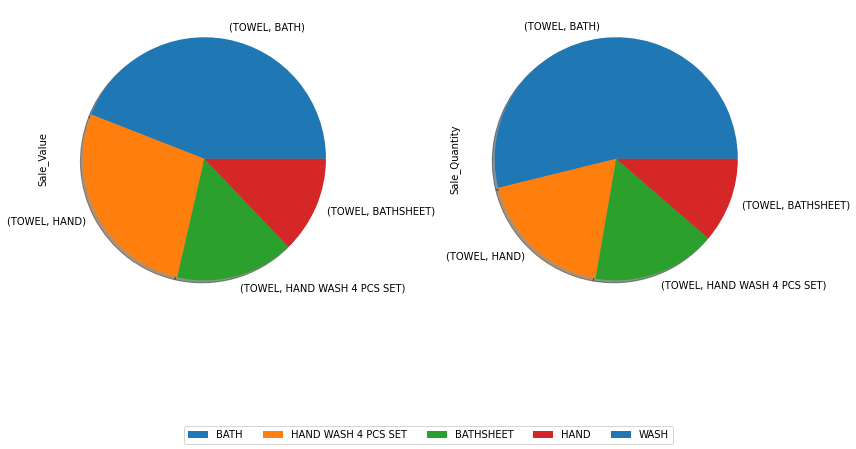

In [44]:

slice_rec_year.groupby(['Product_Group_Category','Product_Group_Sub_Category'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).plot.pie(subplots=True, figsize=(12,8), shadow=True, legend=False)
plt.figlegend(labels=newdata['Product_Group_Sub_Category'].unique(), loc = 'lower center', ncol=5, labelspacing=0. )
plt.tight_layout()

In [41]:
# year_statements = {} 
# year_statements['sent_1'] = 'The sale value for year {year} is $ {val} with the sale of $ {quan} quantity.'
# year_statements['sent_2'] = 'In year {year}, the total sale value was $ {val} after selling {quan} quantities.'
# year_statements['sent_3'] = '{quan} quantities were sold for value $ {val} in the year {year}.'
  
# year_sale_val=[]
# year_sale_quan=[]
# year=[]

# for each in newdata['Year'].unique():
#   year_sale_val.append(round(newdata.loc[newdata['Year']==each]['Sale_Value'].sum()))
#   year_sale_quan.append(round(newdata.loc[newdata['Year']==each]['Sale_Quantity'].sum()))
#   year.append(each)

# year_sale_quan_val=zip(year,year_sale_quan,year_sale_val)

# for year,quan,val in year_sale_quan_val:
#   random_choice=random.choice(list(year_statements.values()))
#   print(random_choice.format(year=year,quan=quan,val=val))
#   print('\n')


# fig, ax=plt.subplots(1,2)
# sn.barplot(x='Year',y='Sale_Quantity',data=newdata, estimator=sum, palette='GnBu_d',ax=ax[0])
# ax[0].set_title('Sales Quantity',fontsize= 8)
# sn.barplot(x='Year',y='Sale_Value',data=newdata, estimator=sum, palette='coolwarm',ax=ax[1])
# ax[1].set_title('Sales Value',fontsize= 8)
# plt.tight_layout()
# plt.subplots_adjust(wspace = 0.8)
# plt.ticklabel_format(axis='y', style='plain')
# print('\n')



# random_store_status_choice=random.choice(list(store_status_statements.values()))
# print(random_store_status_choice.format(active=active, inactive=inactive))
# print('\n')

# fig=plt.figure()
# ax=fig.add_subplot(111)
# sn.countplot(newdata['Store_Status'],palette="Set2", ax=ax)
# plt.ticklabel_format(axis='y', style='plain')
# print('\n')


# random_maxsale_choice=random.choice(list(month_maxsale_statements.values()))
# print(random_maxsale_choice.format(year=recent_year,month=max_month_slice_rec_year,quan=max_quan_slice_rec_year,val=max_val_slice_rec_year))
# print('\n')

# random_minsale_choice=random.choice(list(month_minsale_statements.values()))
# print(random_minsale_choice.format(month=min_month_slice_rec_year,quan=min_quan_slice_rec_year,val=min_val_slice_rec_year))
# print('\n')

# slice_rec_year.groupby(['Month'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).plot.bar(colormap=ListedColormap(sn.color_palette("GnBu")))
# plt.ticklabel_format(axis='y', style='plain')
# print('\n')


# random_maxstore_choice=random.choice(list(store_maxsale_statements.values()))
# print(random_maxstore_choice.format(region=regionname_max,quan=storequan_max,val=storeval_max))
# print('\n')

# random_minstore_choice=random.choice(list(store_minsale_statements.values()))
# print(random_minstore_choice.format(region=regionname_min,quan=storequan_min,val=storeval_min))
# print('\n')

# slice_rec_year.groupby(['Store_Region'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).plot.bar(figsize=(15,5))
# plt.ticklabel_format(axis='y', style='plain')
# print('\n')


# random_maxprod_choice=random.choice(list(product_maxsale_statements.values()))
# print(random_maxprod_choice.format(subprod=subprodname_max,prod=prodname_max,quan=subprodquan_max,val=prodval_max))
# print('\n')

# random_minprod_choice=random.choice(list(product_minsale_statements.values()))
# print(random_minprod_choice.format(subprod=subprodname_min,prod=prodname_min,quan=subprodquan_min,val=prodval_min))
# print('\n')


# slice_rec_year.groupby(['Product_Group_Category','Product_Group_Sub_Category'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).plot.pie(subplots=True, figsize=(12,8), shadow=True, legend=False)
# plt.figlegend(labels=newdata['Product_Group_Sub_Category'].unique(), loc = 'lower center', ncol=5, labelspacing=0. )
# plt.tight_layout()
# print('\n')


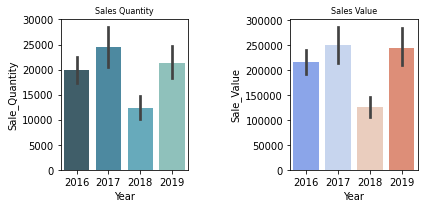

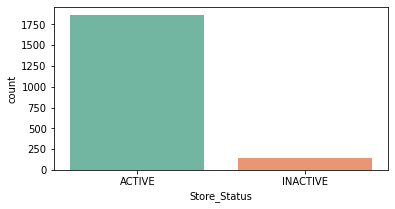

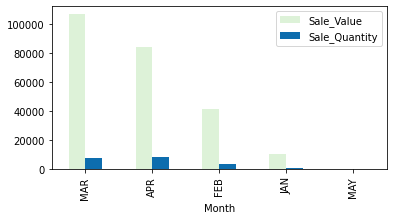

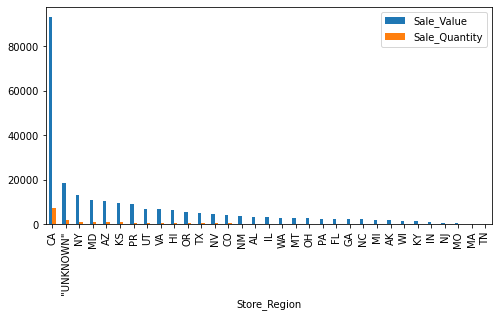

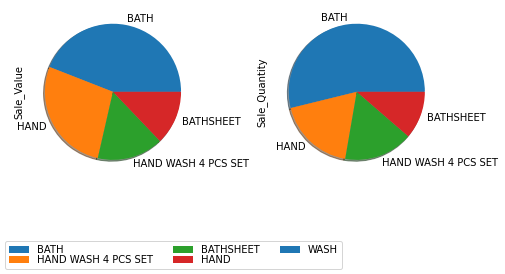

In [42]:
year_statements = {} 
year_statements['sent_1'] = 'The sale value for year {year} is $ {val} with the sale of {quan} quantities.'
year_statements['sent_2'] = 'In year {year}, the total sale value was $ {val} after selling {quan} quantities.'
year_statements['sent_3'] = '{quan} quantities were sold for value $ {val} in the year {year}.'
  
year_sale_val=[]
year_sale_quan=[]
year=[]
all_statements=[]

for each in newdata['Year'].unique():
    year_sale_val.append(round(newdata.loc[newdata['Year']==each]['Sale_Value'].sum()))
    year_sale_quan.append(round(newdata.loc[newdata['Year']==each]['Sale_Quantity'].sum()))
    year.append(each)

year_sale_quan_val=zip(year,year_sale_quan,year_sale_val)

for year,quan,val in year_sale_quan_val:
    random_choice=random.choice(list(year_statements.values()))
    all_statements.append(random_choice.format(year=year,quan=quan,val=val))


# all_statements

random_store_status_choice=random.choice(list(store_status_statements.values()))
random_store_status_choice_state=random_store_status_choice.format(active=active, inactive=inactive)


random_maxsale_choice=random.choice(list(month_maxsale_statements.values()))
random_maxsale_choice_state=random_maxsale_choice.format(year=recent_year,month=max_month_slice_rec_year,quan=max_quan_slice_rec_year,val=max_val_slice_rec_year)

random_minsale_choice=random.choice(list(month_minsale_statements.values()))
random_minsale_choice_state=random_minsale_choice.format(month=min_month_slice_rec_year,quan=min_quan_slice_rec_year,val=min_val_slice_rec_year)

random_maxstore_choice=random.choice(list(store_maxsale_statements.values()))
random_maxstore_choice_state=random_maxstore_choice.format(region=regionname_max,quan=storequan_max,val=storeval_max)

random_minstore_choice=random.choice(list(store_minsale_statements.values()))
random_minstore_choice_state=random_minstore_choice.format(region=regionname_min,quan=storequan_min,val=storeval_min)

random_maxprod_choice=random.choice(list(product_maxsale_statements.values()))
random_maxprod_choice_state=random_maxprod_choice.format(subprod=subprodname_max,prod=prodname_max,quan=subprodquan_max,val=prodval_max)

random_minprod_choice=random.choice(list(product_minsale_statements.values()))
random_minprod_choice_state=random_minprod_choice.format(subprod=subprodname_min,prod=prodname_min,quan=subprodquan_min,val=prodval_min)



fig, ax=plt.subplots(1,2, figsize=(6,3))
sn.barplot(x='Year',y='Sale_Quantity',data=newdata, estimator=sum, palette='GnBu_d',ax=ax[0])
ax[0].set_title('Sales Quantity',fontsize= 8)
sn.barplot(x='Year',y='Sale_Value',data=newdata, estimator=sum, palette='coolwarm',ax=ax[1])
ax[1].set_title('Sales Value',fontsize= 8)
plt.tight_layout()
plt.subplots_adjust(wspace = 0.8)
plt.ticklabel_format(axis='y', style='plain')
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative2Plot\year_plot.png',bbox_inches='tight',dpi=100,figsize=(6,3))


fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)
sn.countplot(newdata['Store_Status'],palette="Set2", ax=ax)
plt.ticklabel_format(axis='y', style='plain')
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative2Plot\store_status_plot.png',bbox_inches='tight',dpi=100,figsize=(6,3))

slice_rec_year.groupby(['Month'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).plot.bar(colormap=ListedColormap(sn.color_palette("GnBu")),figsize=(6,3))
plt.ticklabel_format(axis='y', style='plain')
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative2Plot\month_rev_plot.png',bbox_inches='tight',dpi=100,figsize=(6,3))

slice_rec_year.groupby(['Store_Region'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).plot.bar(figsize=(8,4))
plt.ticklabel_format(axis='y', style='plain')
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative2Plot\region_plot.png',bbox_inches='tight',dpi=100)

slice_rec_year.groupby(['Product_Group_Sub_Category'])['Sale_Value', 'Sale_Quantity'].sum().round().sort_values(by='Sale_Value',ascending=False).plot.pie(subplots=True, figsize=(7,5), shadow=True, legend=False)
plt.figlegend(labels=newdata['Product_Group_Sub_Category'].unique(), loc = 'lower left', ncol=3, labelspacing=0. )
plt.tight_layout()
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative2Plot\prod_plot.png',bbox_inches='tight',dpi=100)


In [43]:
  
# create an instance of a word document 
doc = docx.Document() 
  
# add a heading of level 0 (largest heading) 
doc.add_heading('Narratives and Graphs', 0)
  
# add a paragraph and store  
# the object in a variable 
for each_sent in all_statements:
    doc_para1 = doc.add_paragraph(each_sent,style='List Bullet')
    doc_para1.add_run().bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative2Plot\year_plot.png') 


doc_para2 = doc.add_paragraph(random_store_status_choice_state,style='List Bullet')
doc_para2.add_run().bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative2Plot\store_status_plot.png') 

doc.add_page_break()


doc_para3 = doc.add_paragraph(random_maxsale_choice_state,style='List Bullet')
doc_para3.add_run().bold = True

doc_para4 = doc.add_paragraph(random_minsale_choice_state,style='List Bullet')
doc_para4.add_run().bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative2Plot\month_rev_plot.png') 

doc.add_page_break()


doc_para5 = doc.add_paragraph(random_maxstore_choice_state,style='List Bullet')
doc_para5.add_run().bold = True

doc_para6 = doc.add_paragraph(random_minstore_choice_state,style='List Bullet')
doc_para6.add_run().bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative2Plot\region_plot.png') 

doc.add_page_break()


doc_para7 = doc.add_paragraph(random_maxprod_choice_state,style='List Bullet')
doc_para7.add_run().bold = True

doc_para8 = doc.add_paragraph(random_minprod_choice_state,style='List Bullet')
doc_para8.add_run().bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative2Plot\prod_plot.png') 

# # add a run i.e, style like  
# # bold, italic, underline, etc. 
# doc_para.add_run('hey there, bold here').bold = True
# doc_para.add_run(', and ') 
# doc_para.add_run('these words are italic').italic = True
  
# # add a page break to start a new page 
# doc.add_page_break() 
  
# # add a heading of level 2 
# doc.add_heading('Heading level 2', 2) 
  
# pictures can also be added to our word document 
# width is optional 
  
# now save the document to a location 
doc.save(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative2Plot\test.docx') 